# Adaptive Line Enhancer for speech denoising

This notebook does the following:
1. Load speech and noise files, create additive mixture
2. Choose a learning parameter mu, delta time units which is the range of correlation that is used for statistical prediction

In [1]:
import numpy as np
import matplotlib.pylab as plt

import padasip as pa

In [2]:
""" Generate the noisy speech signal from a clean speech signal by adding noise"""
import librosa 

speech_file = "wav/input/female2.wav"
noise_file = "wav/input/noise_white.wav"

s, fs = librosa.load(speech_file, sr=16000)
s = np.concatenate((s, s))

n, fs_noise = librosa.load(noise_file, sr=16000)

noise_gain = 0.7
n = noise_gain * n[:len(s)]

x = s + n

# Compute the SNR for signal s to noise n
x_snr = 10*np.log10(np.sum(s**2)/np.sum(n**2))
print("SNR: {:.2f}dB".format(x_snr))

SNR: 21.15dB


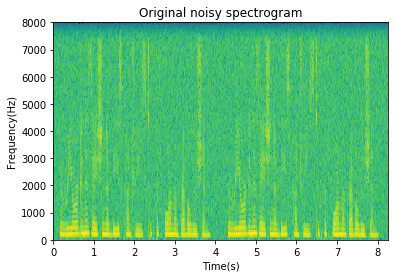

In [3]:
plt.specgram(x, Fs=fs);
plt.title('Original noisy spectrogram');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');

/Users/abhipray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


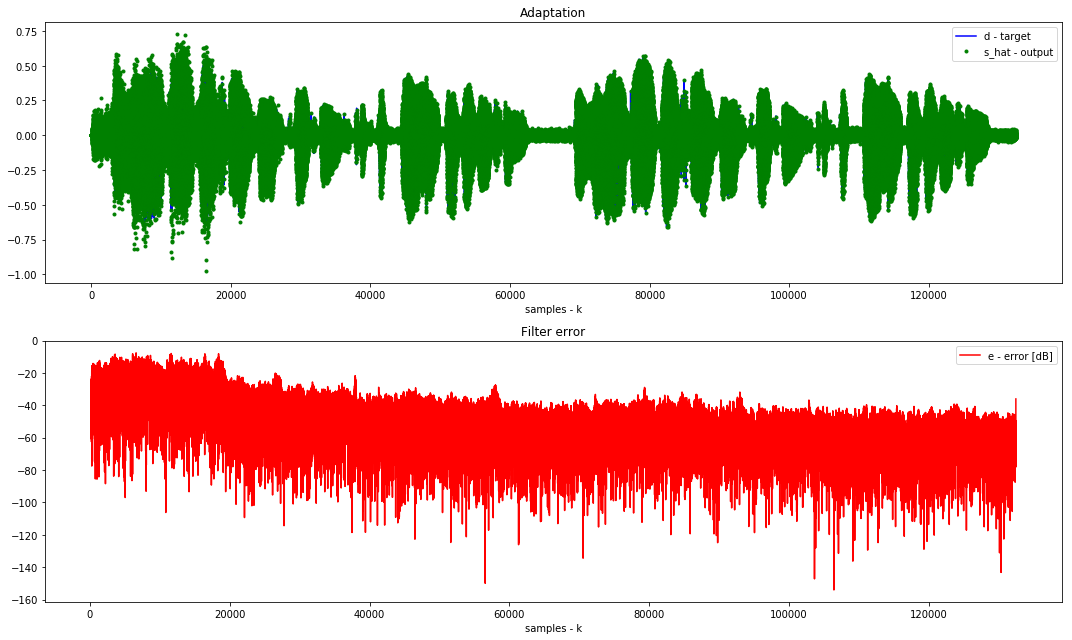

In [4]:
# creation of data
N = 100
delta = 256
x_ale = pa.input_from_history(np.concatenate((np.zeros(delta,), x)), N)

# Create desired signal
d = np.zeros((x_ale.shape[0],))
for i in range(1, x_ale.shape[0]):
    d[i-1] = x_ale[i][0]

# identification
f = pa.filters.FilterLMS(n=N, mu=0.1, w="random")
s_hat, n_hat, weights = f.run(d, x_ale)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(s_hat,"g.", label="s_hat - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(n_hat**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

In [13]:
# Create s_hat2 which is the original speech signal passed through the delay and ALE to see how much distortion there is to the original speech
s_hat2 = []
s_ale = pa.input_from_history(np.concatenate((np.zeros(delta,), s)), N)
for i in range(weights.shape[0]):
    val = np.dot(weights[i], s_ale[i])
    s_hat2.append(val)
    
n_hat2 = []
n_ale = pa.input_from_history(np.concatenate((np.zeros(delta,), n)), N)
for i in range(weights.shape[0]):
    val = np.dot(weights[i], n_ale[i])
    n_hat2.append(val)    

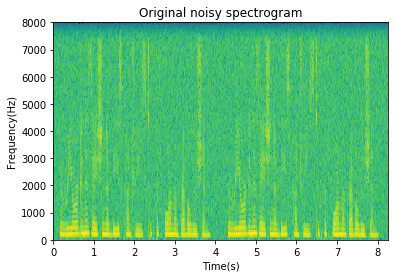

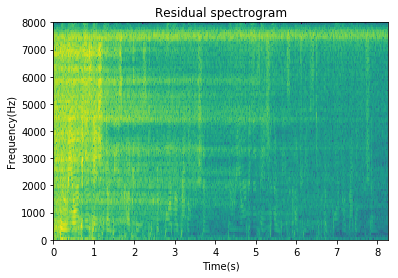

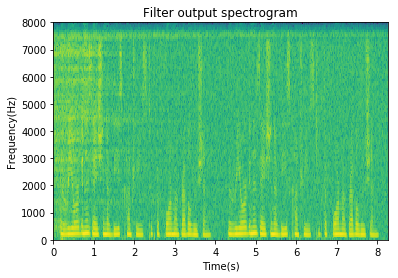

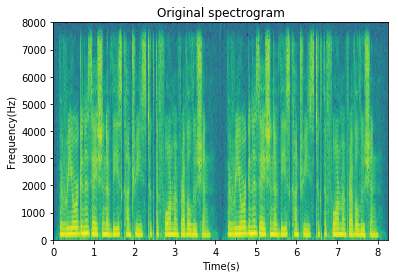

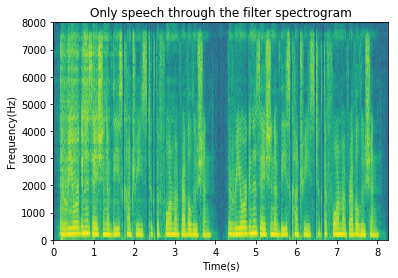

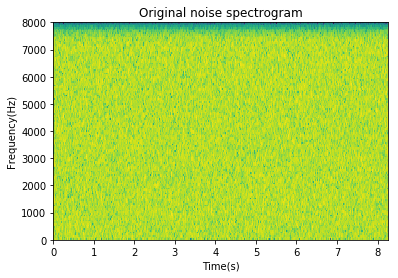

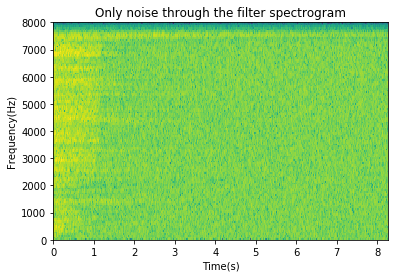

In [15]:
plt.specgram(x, Fs=fs);
plt.title('Original noisy spectrogram');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');
plt.figure();
plt.specgram(n_hat, Fs=fs);
plt.title('Residual spectrogram');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');
plt.figure();
plt.specgram(s_hat, Fs=fs);
plt.title('Filter output spectrogram');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');
plt.figure();
plt.specgram(s, Fs=fs);
plt.title('Original spectrogram');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');
plt.figure();
plt.specgram(s_hat2, Fs=fs);
plt.title('Only speech through the filter spectrogram');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');
plt.figure();
plt.specgram(n, Fs=fs);
plt.title('Original noise spectrogram');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');
plt.figure();
plt.specgram(n_hat2, Fs=fs);
plt.title('Only noise through the filter spectrogram');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');

In [7]:
from IPython.display import Audio

Audio(data=n_hat, rate=fs)

In [8]:
Audio(data=s_hat, rate=fs)

In [12]:
Audio(data=s_hat2, rate=fs)

In [9]:
Audio(data=s, rate=fs)

In [10]:
Audio(data=x, rate=fs)

In [84]:
var_e = np.sum((s_hat2-s_hat)**2)
noise_pow = np.sum(n**2)
print(var_e, noise_pow)

66.40461980620539 26.181173


In [83]:
s_hat.shape, x.shape

((132477,), (132320,))

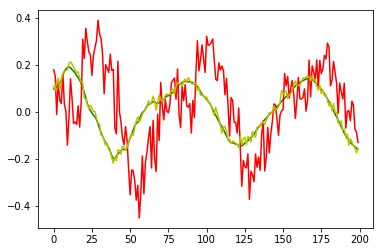

In [68]:
plt.plot(s[10000:10200], 'g')
plt.plot(s_hat[10000+89:10200+89], 'r')
plt.plot(x[10000:10200], 'y')

In [51]:
10*np.log10(np.mean(n_hat[int(16e3):]**2))

-70.25678125054283

In [52]:
10*np.log10(np.mean(n[int(16e3):]**2))

-13.938066959381104

In [53]:
snr = 10*np.log10(np.sum(s_hat[int(16e3):]**2)/np.sum(n_hat[int(16e3):]**2))
print(snr)

58.323904557831696


In [55]:
snr = np.mean((s-s_hat)**2)
print(snr)
10*np.log10(snr)

ValueError: operands could not be broadcast together with shapes (132320,) (132567,) 

In [20]:
w.shape

(132231, 100)